# Linear Regression Assignment
By **Sai Vamsy Dhulipala**

## 1. Problem Statement

A US bike-sharing provider **BoomBikes** has recently **suffered considerable dips in their revenues**. They have contracted a consulting company to **understand the factors on which the demand for these shared bikes depends**. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. **The company wants to know:**
- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands.**

## 2. Initial Data Preperation

### 2.1 Importing libraries

**Importing libraries for data analysis**

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",50)

**Importing libraries for data visualization**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

**Importing libraries for machine learning**

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

**Suppressing warnings**

In [5]:
import warnings
warnings.filterwarnings("ignore")

### 2.2 Importing and inspecting the dataset

**Importing the dataseet**

In [6]:
rental = pd.read_csv("day.csv")

In [7]:
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Understanding the shape and structure**

In [8]:
rental.shape

(730, 16)

In [9]:
rental.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 133.4 KB


<span style = "color:green">We find that no columns have missing values present. Hence, there is no need for futher imputation.</span>

### 2.3 Transforming the dataset by adding/removing columns

**Adding string equivalents to numeric categorical variables**

**A. `season`**

In [10]:
rental["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

<span style = "color:green">We understand from the Data Dictonary that `1`,`2`,`3`,`4` represent `Spring`, `Summer`, `Fall`, `Winter`. Hence, adding a column to represent the same.</span>

In [11]:
rental["season_name"] = rental[["season"]].apply(lambda x: x.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"}))

**B. `weekday`**

In [12]:
rental["weekday"].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

<span style = "color:green">Adding names `Sunday` to `Saturday` to representing weekdays `0` to `6` respectively.</span>

In [13]:
rental["weekday_name"] = rental[["weekday"]].apply(lambda x: x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",
                                                                    4:"Thu",5:"Fri",6:"Sat"}))

**C. `mnth`**

In [14]:
rental["mnth"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

<span style = "color:green">Adding names `Jan` to `Dec` to representing months `1` to `12` respectively.</span>

In [15]:
rental["mnth_name"] = rental[["mnth"]].apply(lambda x: x.map({1:"Jan",2:"Feb",3:"Mar",
                                                              4:"Apr",5:"May",6:"Jun",
                                                              7:"Jul",8:"Aug",9:"Sep",
                                                              10:"Oct",11:"Nov",12:"Dec"}))

**D. `yr`**

In [16]:
rental["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

<span style = "color:green">Adding `2018` and `2019` to `0` and `1` respectively.</span>

In [17]:
rental["year"] = rental[["yr"]].apply(lambda x: x.map({0:"2018",1:"2019"}))

***Creating an additional column `mnth_yr` to represent month and year at once***

In [18]:
rental["mnth_yr"] = rental["mnth_name"] + "-" + rental["year"].str[2:]

**E. `weathersit`**

In [19]:
rental["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

<span style = "color:green">The description for `weatherist` column is as follows:</span>
- `1`:<span style = "color:green"> Clear, Few clouds, Partly cloudy, Partly cloudy</span>
- `2`:<span style = "color:green"> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</span>
- `3`:<span style = "color:green"> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</span>
- `4`:<span style = "color:green"> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</span>

<span style = "color:green">Upon going through the description, we can rate the weather situation as `Very Good`, `Good`, `Bad` and `Very Bad` for `1`,`2`,`3` and `4` respectively.</span>

In [20]:
rental["weather_category"] = rental[["weathersit"]].apply(lambda x: x.map
                                                          ({1:"Very Good",2:"Good",3:"Bad",4:"Very Bad"}))

**F. `workingday`**

In [21]:
rental["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

<span style = "color:green">Adding `Yes` and `No` to `1` and `0` respectively.</span>

In [22]:
rental["working_day"] = rental[["workingday"]].apply(lambda x: x.map({1:"Yes",0:"No"}))

**Dropping unecessary columns**

**A. `instant`**

In [23]:
rental.drop("instant",axis=1,inplace=True)

**B. `holiday`**

In [24]:
rental["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [25]:
rental["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [26]:
rental[(rental["workingday"]==1)&(rental["holiday"]==0)].shape[0]

499

In [27]:
rental[(rental["workingday"]==1)&(rental["holiday"]==1)].shape[0]

0

In [28]:
rental[(rental["workingday"]==0)&(rental["holiday"]==0)].shape[0]

210

In [29]:
rental[(rental["workingday"]==0)&(rental["holiday"]==1)].shape[0]

21

<span style = "color:green">We understand that `holiday` column is not necessary as the same is represented in the `workingday` column. Hence, dropping the `holiday` column.</span>

In [30]:
rental.drop("holiday",axis=1,inplace=True)

**Rearranging the columns**

In [31]:
rental = rental[["dteday","mnth","mnth_name","yr","year","mnth_yr",
                 "weekday","weekday_name","workingday","working_day","season",
                 "season_name","weathersit","weather_category","temp","atemp",
                 "hum","windspeed","casual","registered","cnt"]]

In [32]:
rental.head()

,dteday,mnth,mnth_name,yr,year,mnth_yr,weekday,weekday_name,workingday,working_day,season,season_name,weathersit,weather_category,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,Jan,0,2018,Jan-18,6,Sat,0,No,1,Spring,2,Good,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,Jan,0,2018,Jan-18,0,Sun,0,No,1,Spring,2,Good,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,Jan,0,2018,Jan-18,1,Mon,1,Yes,1,Spring,1,Very Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,Jan,0,2018,Jan-18,2,Tue,1,Yes,1,Spring,1,Very Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,Jan,0,2018,Jan-18,3,Wed,1,Yes,1,Spring,1,Very Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 3. Exploratory Data Analysis

### 3.1 Trend analysis of monthly rentals

In [33]:
data = rental.groupby(["yr","mnth","mnth_yr"]) \
[["casual","registered","cnt"]].aggregate("sum").reset_index().drop(["yr","mnth"],axis=1)

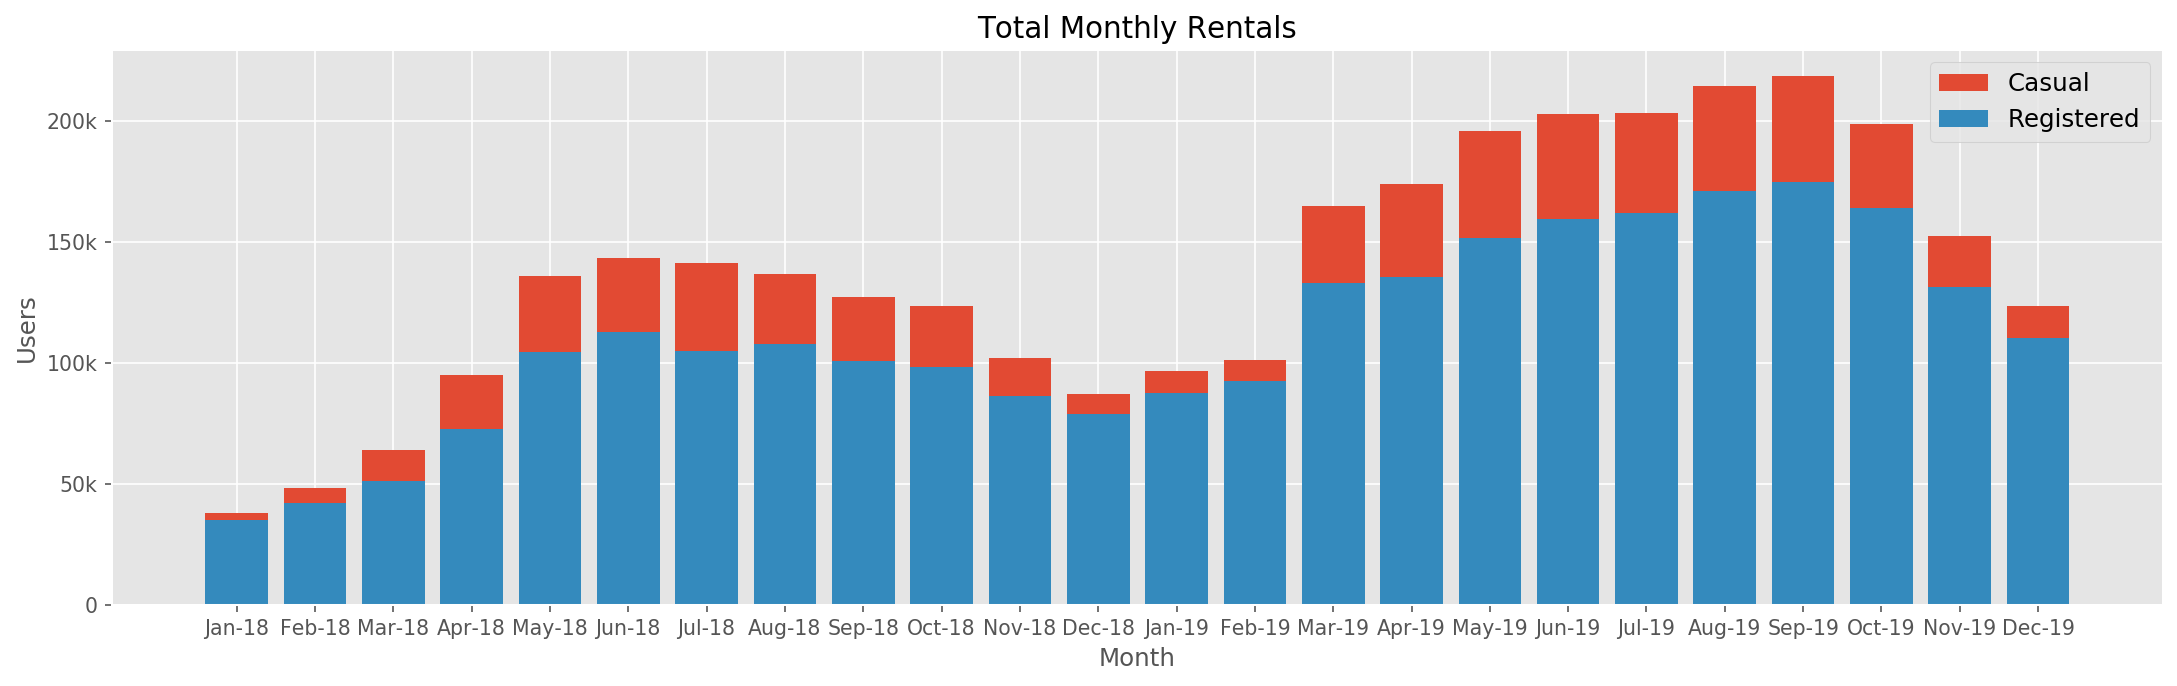

In [34]:
fig,ax = plt.subplots(figsize=(18,5),dpi=147)

casual = ax.bar(x="mnth_yr",height="cnt",data=data)
registered = ax.bar(x="mnth_yr",height="registered",data=data)

ax.set_title("Total Monthly Rentals")
ax.set_xlabel("Month")
ax.set_ylabel("Users")
ax.set_yticklabels(["0","50k","100k","150k","200k","250k"])
ax.legend(handles=(casual,registered),labels=("Casual","Registered"),loc=1,fontsize="large")

fig.show()

<span style = "color:green">Upon observing the trend, we can understand that the number of rentals are rapidly increasing from `Jan` to `May`, becoming stable during the months of `Jun` to `Sep` and are having a steep downtrend from `Oct` to `Dec`.</span>

### 3.2 Analysis of rentals by season

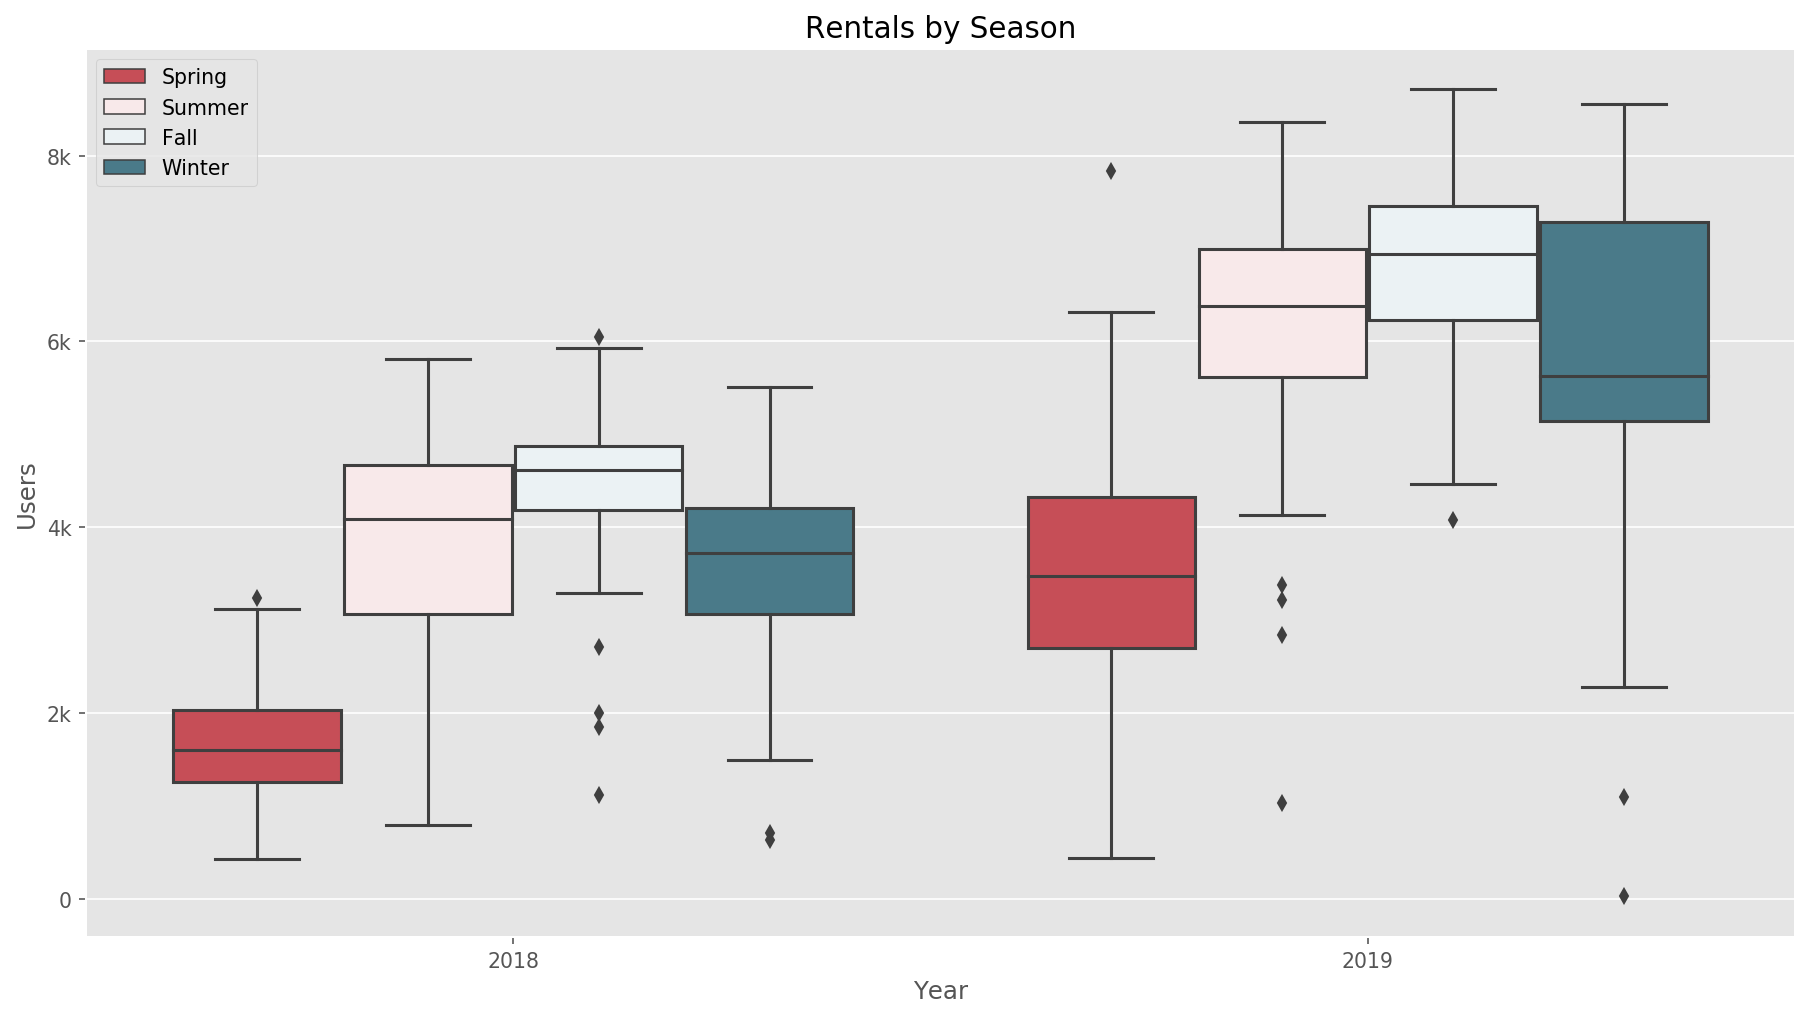

In [35]:
fig,ax = plt.subplots(figsize=(15,8),dpi=147)

sns.boxplot(x="year",y="cnt",hue="season_name",data=rental,palette=sns.diverging_palette(10,220,sep=80,n=4))

ax.set_title("Rentals by Season")
ax.set_xlabel("Year")
ax.set_ylabel("Users")
ax.set_yticklabels(["-2k","0","2k","4k","6k","8k","10k"])
ax.legend(loc=0)

fig.show()

<span style = "color:green">From the above Boxplot we can infer that the median rentals are highest during `Fall`, followed by `Summer` and `Winter` and the least during `Spring`.</span>

### 3.3 Analysis of rentals by weekday

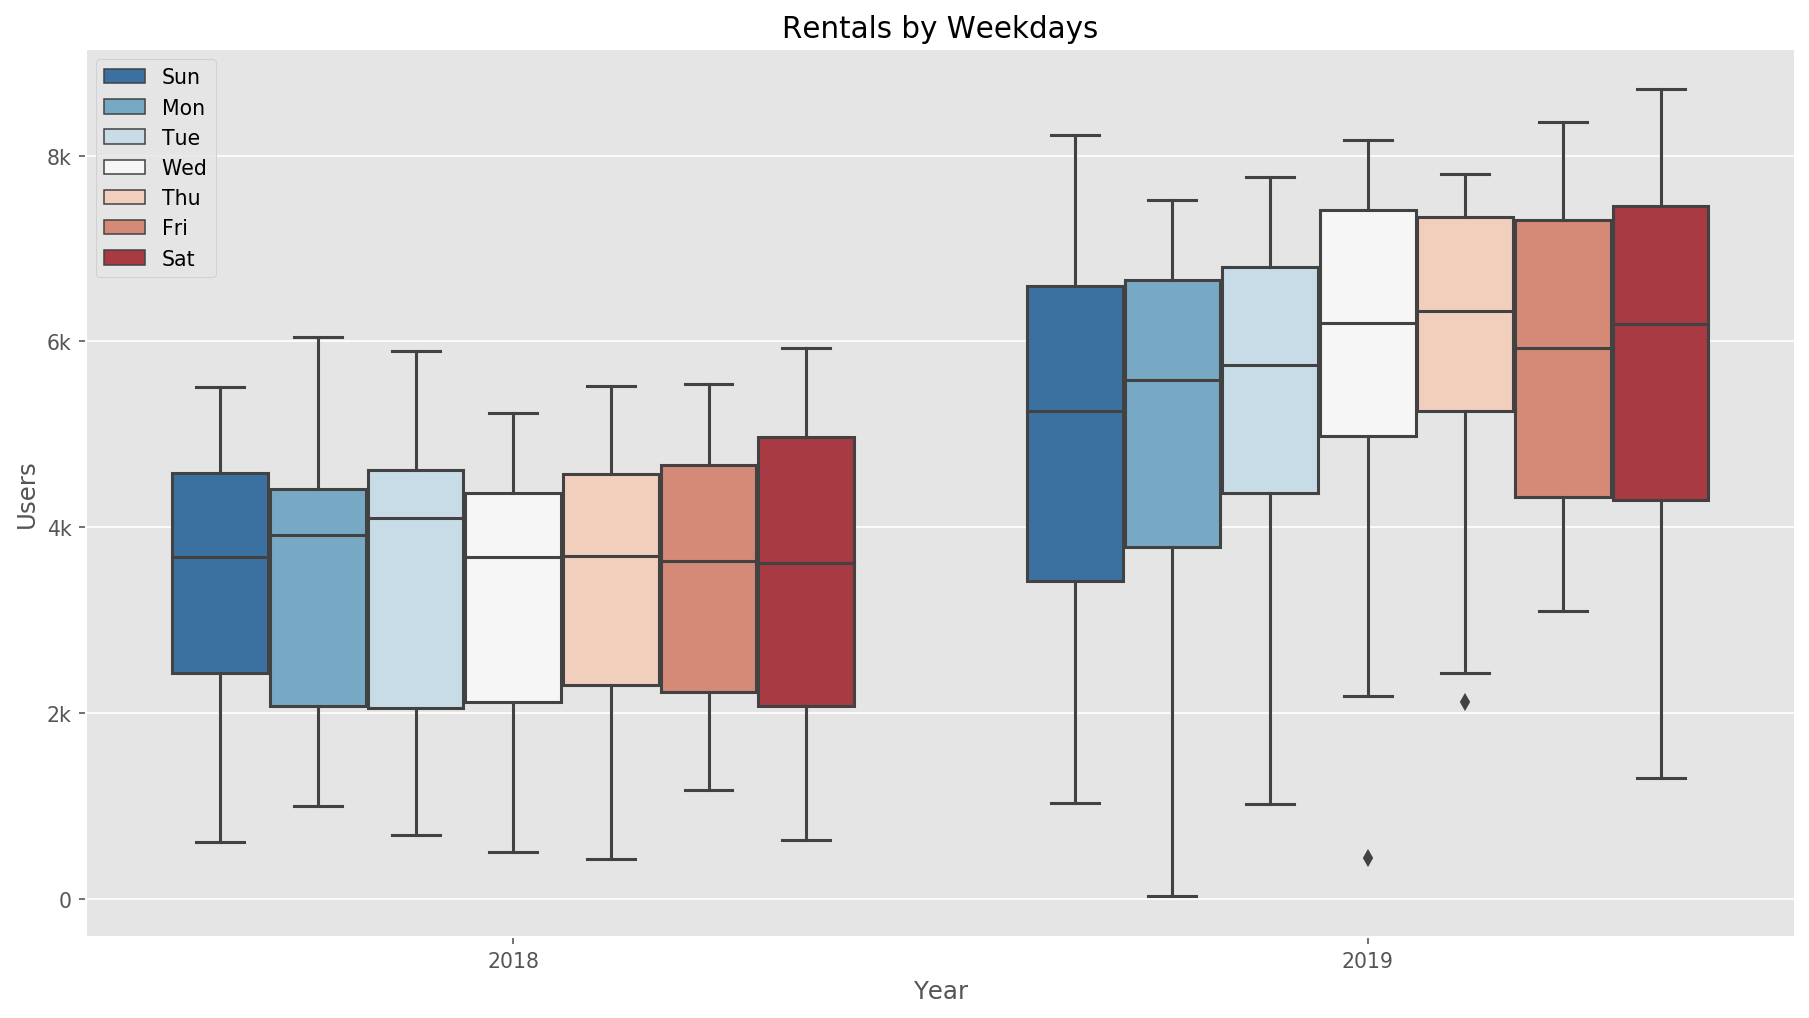

In [36]:
fig,ax = plt.subplots(figsize=(15,8),dpi=147)

sns.boxplot(x="year",y="cnt",hue="weekday_name",data=rental.sort_values("weekday")
                  ,palette=sns.color_palette("RdBu_r", 7))

ax.set_title("Rentals by Weekdays")
ax.set_xlabel("Year")
ax.set_ylabel("Users")
ax.set_yticklabels(["-2k","0","2k","4k","6k","8k"])
ax.legend(loc=0)

fig.show()

<span style = "color:green">If we closely observe the Boxplot for both the years, we can understand that during 2018, except for on `Monday` and `Tuesday`, the median rentals were almost equal during the rest of the days. Whereas during 2019, the Median rentals were on constant rise till `thursday` and came down again by weekend.</span>

### 3.4 Analysis of rentals by weather situation

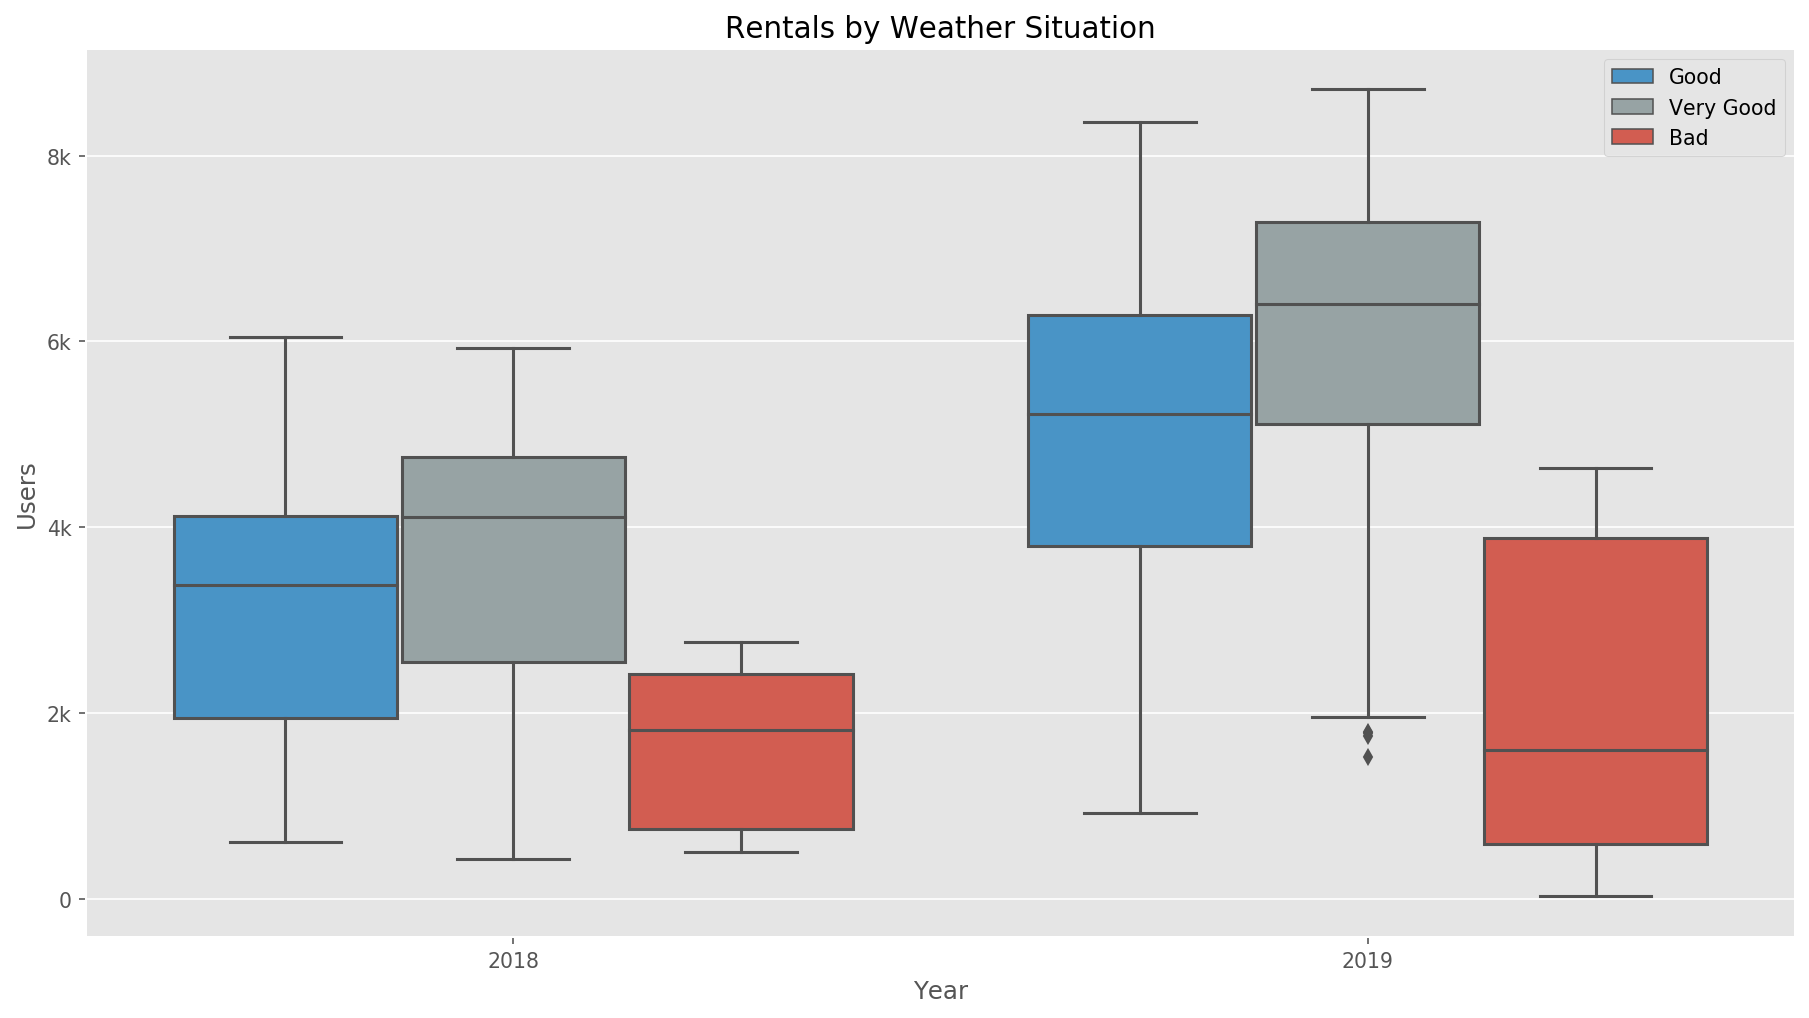

In [37]:
fig,ax = plt.subplots(figsize=(15,8),dpi=147)

sns.boxplot(x="year",y="cnt",hue="weather_category",data=rental
                  ,palette=["#3498db", "#95a5a6", "#e74c3c"])

ax.set_title("Rentals by Weather Situation")
ax.set_xlabel("Year")
ax.set_ylabel("Users")
ax.set_yticklabels(["-2k","0","2k","4k","6k","8k"])
ax.legend(loc=0)

fig.show()

<span style = "color:green">As we can see, the Boxplot proves the assumption of the rentals being directly proportional to the weather situation.</span>

### 3.5 Analysis of rentals by working day

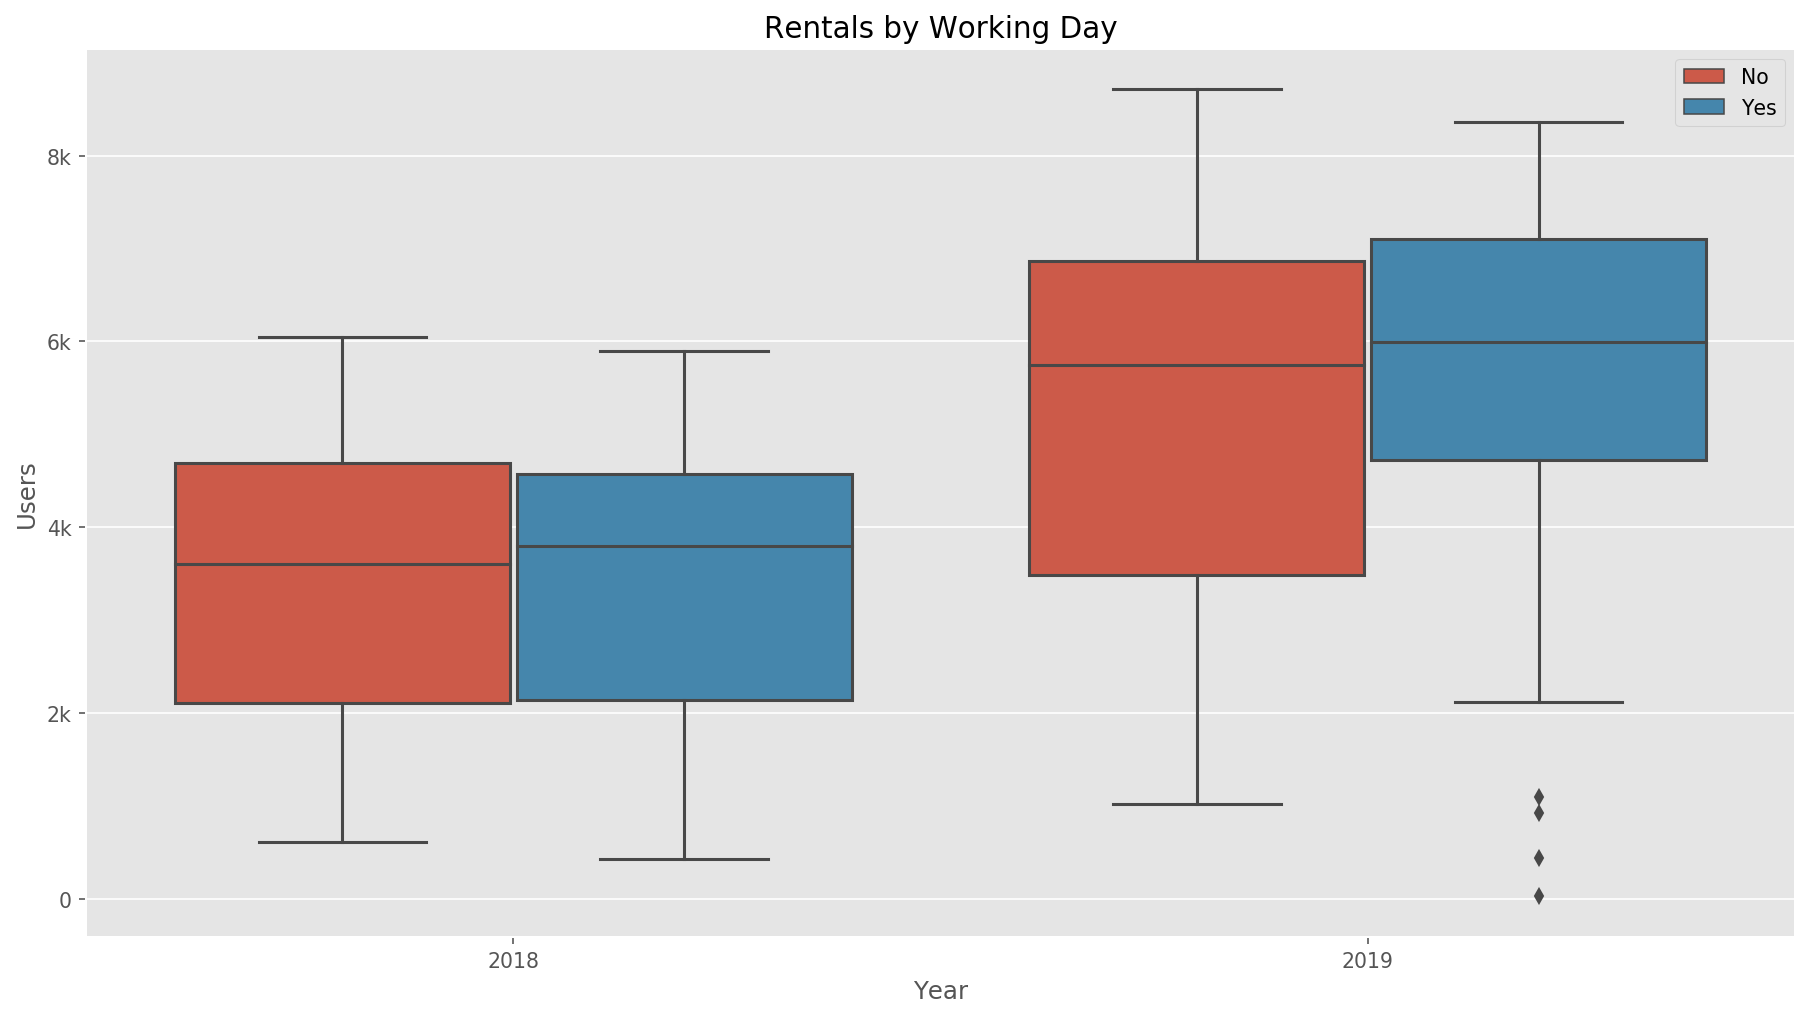

In [38]:
fig,ax = plt.subplots(figsize=(15,8),dpi=147)

sns.boxplot(x="year",y="cnt",hue="working_day",data=rental)

ax.set_title("Rentals by Working Day")
ax.set_xlabel("Year")
ax.set_ylabel("Users")
ax.set_yticklabels(["-2k","0","2k","4k","6k","8k"])
ax.legend(loc=0)

fig.show()

<span style = "color:green">We can understand from the boxplot that there is no much difference in the median daily rentals depending on whether or not it is a working day. Although, the median number of rentals are higher on a working day.</span>

<span style = "color:green">**Upon making all the above analyses, we can infer that major chunk of customers seem to be working professionals, since we can clearly observe that the rentals are higher during weekdays than weekends and during working days than holidays.**</span>

## 4. Creating a Linear Regression Model

### 4.1 Creating a new dataframe with necessary variables

In [39]:
df = rental[["mnth","yr","weekday","workingday","season","weathersit","temp","atemp","hum","windspeed","cnt"]]
df.head()

,mnth,yr,weekday,workingday,season,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,2,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,3,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 4.2 Creating a correlation heatmap

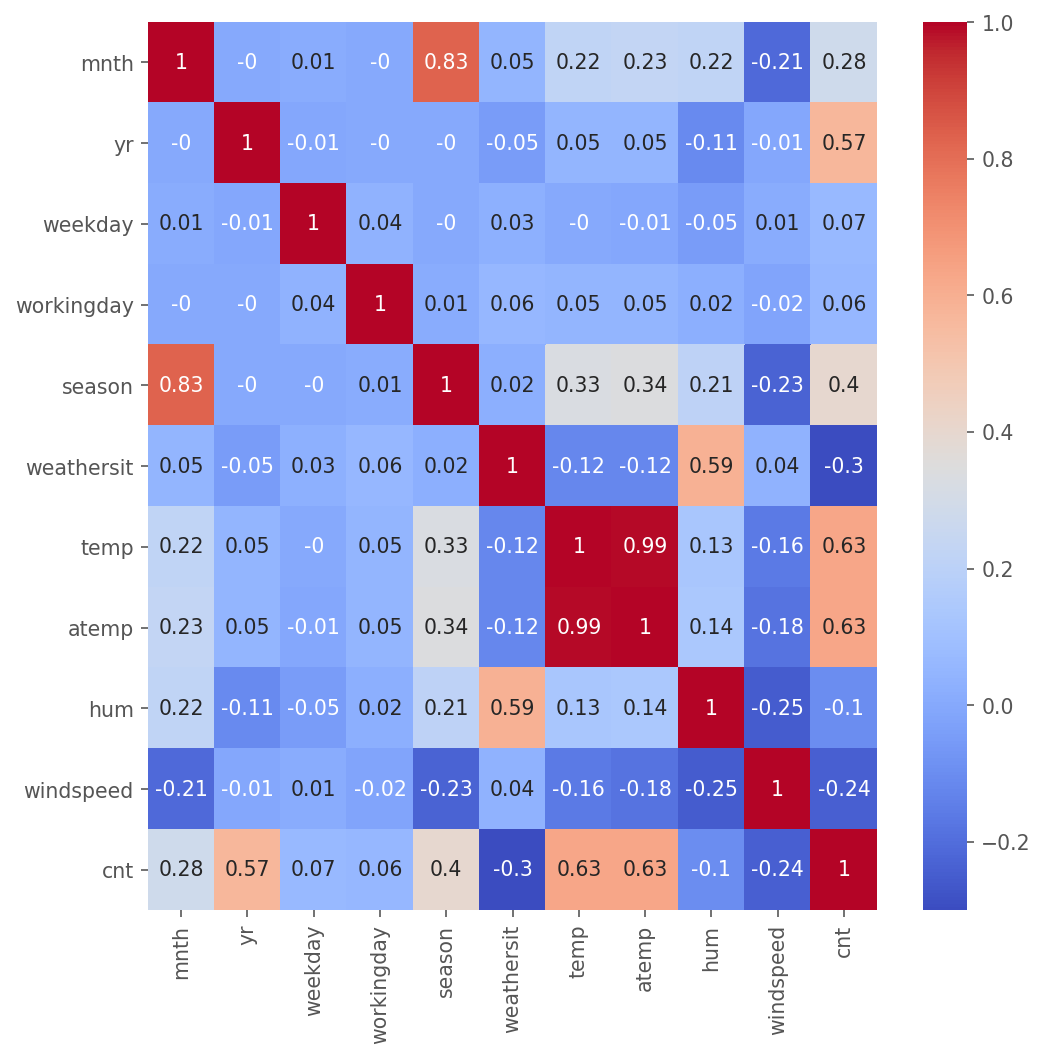

In [40]:
fig,ax = plt.subplots(figsize=(8,8),dpi=147)

sns.heatmap(df.corr().round(2),cmap="coolwarm",annot=True)

fig.show()

<span style = "color:green">From the above heatmap we can understand that the following variables have moderate to high positive correlation with the target variable `cnt`</span>:
- <span style = "color:green">`atemp` = 0.63</span>
- <span style = "color:green">`temp` = 0.63</span>
- <span style = "color:green">`yr` = 0.57</span>
- <span style = "color:green">`season` = 0.40</span>
- <span style = "color:green">`mnth` = 0.28</span>

<span style = "color:green">And the following variables have moderate negative correlation with the target vatiable `cnt`</span>:
- <span style = "color:green">`windspeed` = -0.24</span>
- <span style = "color:green">`weathersit` = -0.30</span>

<span style = "color:green">Also, there exists multicollienarity between the following variables</span>:
- <span style = "color:green">`atemp` - `temp` = 0.99</span>
- <span style = "color:green">`mnth` - `season` = 0.83</span>
- <span style = "color:green">`hum` - `weathersit` = 0.59</span>
- <span style = "color:green">`atemp` - `season` = 0.34</span>
- <span style = "color:green">`season` - `temp` = 0.33</span>
- <span style = "color:green">`mnth` - `windspeed` = -0.21</span>
- <span style = "color:green">`season` - `windspeed` = -0.23</span>
- <span style = "color:green">`hum` - `windspeed` = -0.25</span>

### 4.3 Splitting the data into train and test

In [41]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### 4.4 Scaling the variables

In [42]:
scaler = MinMaxScaler()

In [43]:
cols = ["mnth","weekday","season","weathersit","temp","atemp","hum","windspeed","cnt"]

df_train[cols] = scaler.fit_transform(df_train[cols])

df_test[cols] = scaler.transform(df_test[cols])

In [44]:
df_train.describe()

,mnth,yr,weekday,workingday,season,weathersit,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504456,0.507843,0.498366,0.676471,0.505882,0.20098,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.315338,0.500429,0.336182,0.468282,0.370649,0.27377,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.166667,0.000000,0.333333,0.00000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.545455,1.000000,0.500000,1.000000,0.666667,0.00000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.818182,1.000000,0.833333,1.000000,0.666667,0.50000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_test.describe()

,mnth,yr,weekday,workingday,season,weathersit,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.479452,0.503044,0.698630,0.485540,0.187215,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.311080,0.500722,0.331402,0.459904,0.369821,0.269422,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.272727,0.000000,0.166667,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.454545,0.000000,0.500000,1.000000,0.333333,0.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,0.727273,1.000000,0.833333,1.000000,0.666667,0.500000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
y_test = df_test.pop('cnt')
X_test = df_test

### 4.5 Buliding and fine-tuning the model

**Defining a function to get the summary statistics and VIF of the model**

In [48]:
def lr_apply(X_train,y_train):
    
    global X_train_lm
    X_train_lm = sm.add_constant(X_train)
    
    global lr
    lr = sm.OLS(y_train, X_train_lm).fit()

    p_values = lr.pvalues.round(3)
    p_values.name = "p-value"

    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = vif['VIF'].round(2)
    vif.sort_values(by = "VIF", ascending = False,inplace=True)
    vif.set_index("Features",inplace=True)
    vif = vif.join(p_values,how="inner")

    print(lr.summary())
    print("")
    print(vif)

In [49]:
lr_apply(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.27e-169
Time:                        22:49:21   Log-Likelihood:                 452.99
No. Observations:                 510   AIC:                            -884.0
Df Residuals:                     499   BIC:                            -837.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1726      0.032      5.407      0.0

<span style = "color:green">As we can notice, the variable `temp` has a high VIF `332.73` and a high p-value `0.142` as well. Hence, this variable isn't of much use and should be dropped.</span>

**dropping `temp`**

In [50]:
X_train.drop("temp",axis=1,inplace=True)

In [51]:
lr_apply(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.98e-170
Time:                        22:49:21   Log-Likelihood:                 451.89
No. Observations:                 510   AIC:                            -883.8
Df Residuals:                     500   BIC:                            -841.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1701      0.032      5.332      0.0

<span style = "color:green">As we can notice, the variable `mnth` has a high VIF `13.28` and a high p-value `0.443` as well. Hence, this variable isn't of much use and should be dropped.</span>

**dropping `mnth`**

In [52]:
X_train.drop("mnth",axis=1,inplace=True)

In [53]:
lr_apply(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.14e-171
Time:                        22:49:21   Log-Likelihood:                 451.59
No. Observations:                 510   AIC:                            -885.2
Df Residuals:                     501   BIC:                            -847.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1684      0.032      5.294      0.0

<span style = "color:green">As we can notice, the variable `hum` has a high VIF `14.87` and a high p-value `0.016` as well. Hence, this variable isn't of much use and should be dropped.</span>

**dropping `hum`**

In [54]:
X_train.drop("hum",axis=1,inplace=True)

In [55]:
lr_apply(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     286.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.60e-171
Time:                        22:49:21   Log-Likelihood:                 448.61
No. Observations:                 510   AIC:                            -881.2
Df Residuals:                     502   BIC:                            -847.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1075      0.020      5.467      0.0

<span style = "color:green">As we can understand, the current model is having an `R-Squared` and `Adj. R-Squared` of `0.80` and `0.797` respectively. Also, all the variables have relatively low VIF and highly insignificant p-values. Hence, this model can be used to move forward.</span>

### 4.6 Residual analysis

In [56]:
y_train_pred = lr.predict(X_train_lm)

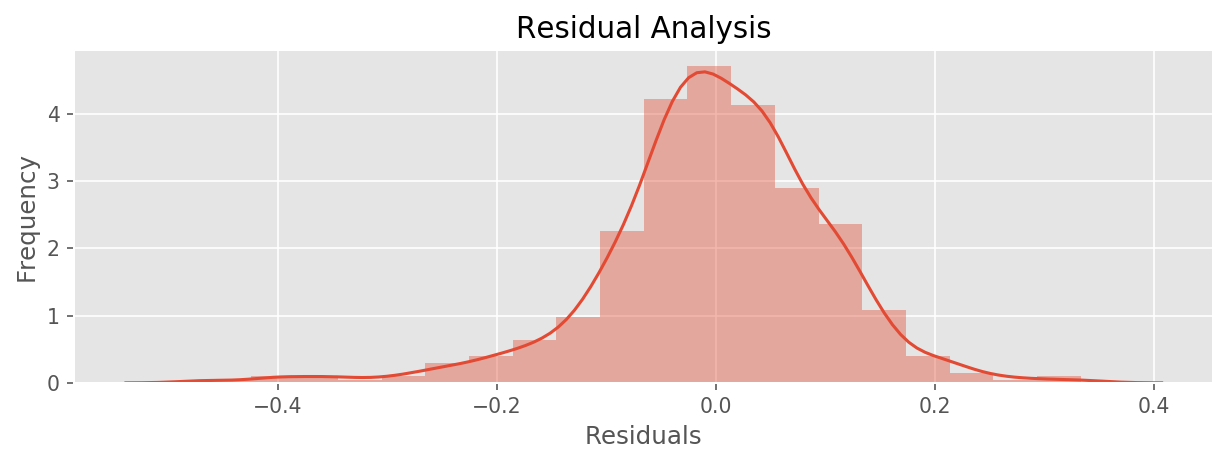

In [57]:
fig,ax = plt.subplots(figsize=(10,3),dpi=147)

sns.distplot((y_train - y_train_pred),bins = 20)

ax.set_title("Residual Analysis")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")

fig.show()

<span style = "color:green">The histogram also confirms that the residuals are normally distributed.</span>

### 4.7 Making predictions using the model

In [58]:
X_test.drop(["temp","mnth","hum"],axis=1,inplace=True)

In [59]:
X_test_lm = sm.add_constant(X_test)

In [60]:
y_pred = lr.predict(X_test_lm)

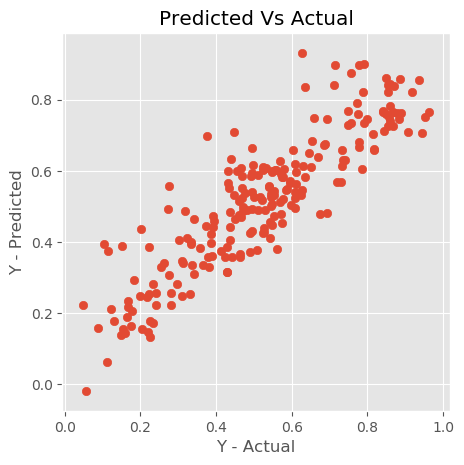

In [61]:
fig,ax = plt.subplots(figsize=(5,5),dpi=100)

ax.scatter(y_test, y_pred)
ax.set_xlabel("Y - Actual")
ax.set_ylabel("Y - Predicted")
ax.set_title("Predicted Vs Actual")

fig.show()

## 5. Conclusion

#### We can see that the equation of our best fitted line is:

$ cnt = 0.1131 + 0.2375  \times  yr + 0.0550 \times weekday + 0.0254 \times workingday + 0.1269 \times season - 0.1894 \times weathersit + 0.5007 \times atemp - 0.1367 \times windspeed $